In [12]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import math

In [13]:
def ReLU(preactivation):
    activation = preactivation.clip(0.0)
    return activation

In [14]:
def shallow_nn(x, beta_0, omega_0, beta_1, omega_1):
    n_data = x.size
    x = np.reshape(x,(1,n_data))
    h1 = ReLU(np.matmul(beta_0, np.ones((1, n_data))) + np.matmul(omega_0, x))
    model_out = np.matmul(beta_1, np.ones((1, n_data))) + np.matmul(omega_1, h1)
    return model_out

In [19]:
def get_parameters():
    beta_0 = np.zeros((3,1))
    omega_0 = np.zeros((3,1))
    beta_1 = np.zeros((1,1))
    omega_1 = np.zeros((1,3))
    
    beta_0[0,0] = 0.3; beta_0[1,0] = -1.0; beta_0[2,0] = -0.5
    omega_0[0,0] = -1.0; omega_0[1,0] = 1.8; omega_0[2,0] = 0.65
    beta_1[0,0] = 2.6;
    omega_1[0,0] = -24.0; omega_1[0,1] = -8.0; omega_1[0,2] = 50.0

    
    return beta_0, omega_0, beta_1, omega_1

In [20]:

# 데이터 시각화 함수
def plot_binary_classification(x_model, out_model, lambda_model, x_data=None, y_data=None, title=None):
    # Make sure model data are 1D arrays
    # 다차원 배열을 1차원 배열로 바꾸어줌 np.squeeze()
    x_model = np.squeeze(x_model)
    out_model = np.squeeze(out_model)
    lambda_model = np.squeeze(lambda_model)

    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(7.0, 3.5)
    fig.tight_layout(pad=3.0)
    ax[0].plot(x_model,out_model)
    ax[0].set_xlabel('Input'); ax[0].set_ylabel('Model output')
    ax[0].set_xlim([0,1]);ax[0].set_ylim([-4,4])
    if title is not None:
        ax[0].set_title(title)
    ax[1].plot(x_model,lambda_model)
    ax[1].set_xlabel('Input'); ax[1].set_ylabel('lambda or Pr(y=1|x)')
    ax[1].set_xlim([0,1]);ax[1].set_ylim([-0.05,1.05])
    if title is not None:
        ax[1].set_title(title)
    if x_data is not None:
        ax[1].plot(x_data, y_data, 'ko')
    plt.show()


In [21]:
# Sigmoid function that maps [-infty,infty] to [0,1]
def sigmoid(model_out):
  # TODO -- implement the logistic sigmoid function from equation 5.18
  sig_model_out = 1/(1+np.exp((-1*model_out)))

  return sig_model_out

"""
def softmax(model_out):
    exp_model_out = np.exp(model_out)
    sum_exp_model_out = np.sum(exp_model_out, axis=0)
    softmax_model_out = exp_model_out / sum_exp_model_out
    return softmax_model_out
"""


'\ndef softmax(model_out):\n    exp_model_out = np.exp(model_out)\n    sum_exp_model_out = np.sum(exp_model_out, axis=0)\n    softmax_model_out = exp_model_out / sum_exp_model_out\n    return softmax_model_out\n'

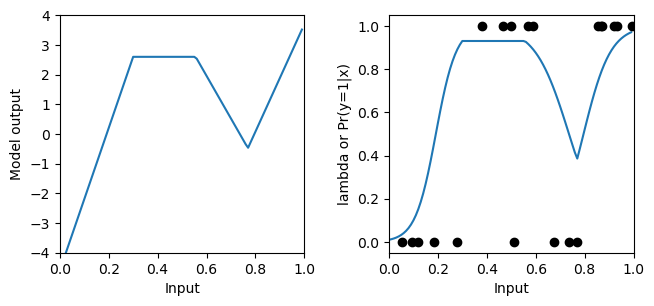

In [22]:

# 학습 데이터 생성
x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([0,1,1,0,0,1,\
                    1,0,0,1,0,1,\
                    0,1,1,0,1,0, \
                    1,1])

# 모델 파라미터 가져오기 및 모델 실행
beta_0, omega_0, beta_1, omega_1 = get_parameters()
x_model = np.arange(0, 1, 0.01)
model_out = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
lambda_model = sigmoid(model_out)
plot_binary_classification(x_model, model_out, lambda_model, x_train, y_train)



In [23]:
# 범주형 분포 확률 계산 함수
def bernoulli_distribution(y, lambda_param):
    return (1-lambda_param)**(1-y)*(lambda_param)**y

In [24]:
# Let's double check we get the right answer before proceeding
print("Correct answer = %3.3f, Your answer = %3.3f"%(0.8,bernoulli_distribution(0,0.2)))
print("Correct answer = %3.3f, Your answer = %3.3f"%(0.2,bernoulli_distribution(1,0.2)))

Correct answer = 0.800, Your answer = 0.800
Correct answer = 0.200, Your answer = 0.200


In [26]:
# 우도 계산 함수
def compute_likelihood(y_train, lambda_param):
    likelihood = np.prod(bernoulli_distribution(y_train, lambda_param))
    return likelihood


In [27]:
# Let's test this
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the mean of the Gaussian
model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
lambda_train = sigmoid(model_out)
# Compute the likelihood
likelihood = compute_likelihood(y_train, lambda_train)
# Let's double check we get the right answer before proceeding
print("Correct answer = %9.9f, Your answer = %9.9f"%(0.000070237,likelihood))

Correct answer = 0.000070237, Your answer = 0.000070237


In [30]:

# 음의 로그 우도 계산 함수
def compute_negative_log_likelihood(y_train, lambda_param):
    nll = -np.sum((np.log(bernoulli_distribution(y_train, lambda_param))))
    return nll



In [31]:
# Let's test this
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the mean of the Gaussian
model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
# Pass through the sigmoid function
lambda_train = sigmoid(model_out)
# Compute the log likelihood
nll = compute_negative_log_likelihood(y_train, lambda_train)
# Let's double check we get the right answer before proceeding
print("Correct answer = %9.9f, Your answer = %9.9f"%(9.563639387,nll))

Correct answer = 9.563639387, Your answer = 9.563639387


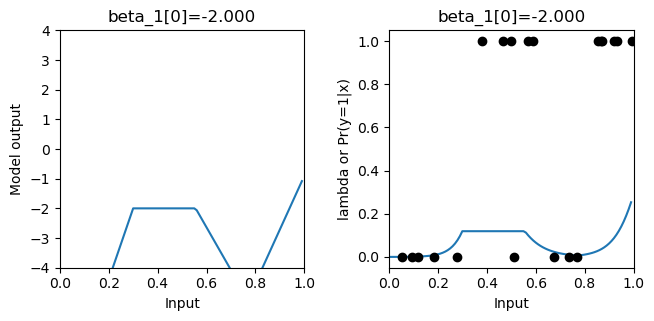

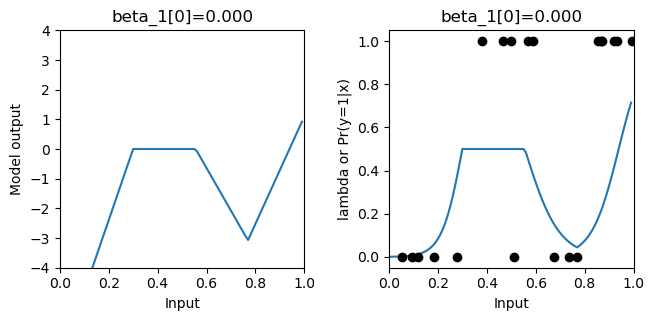

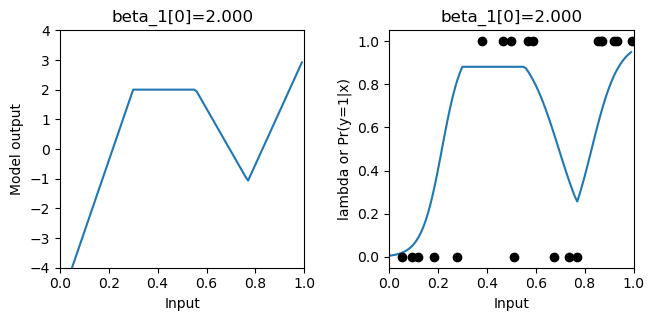

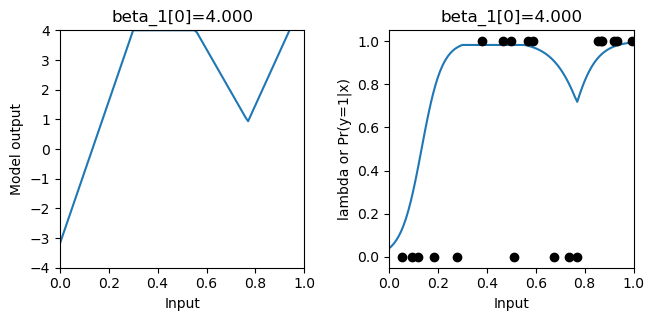

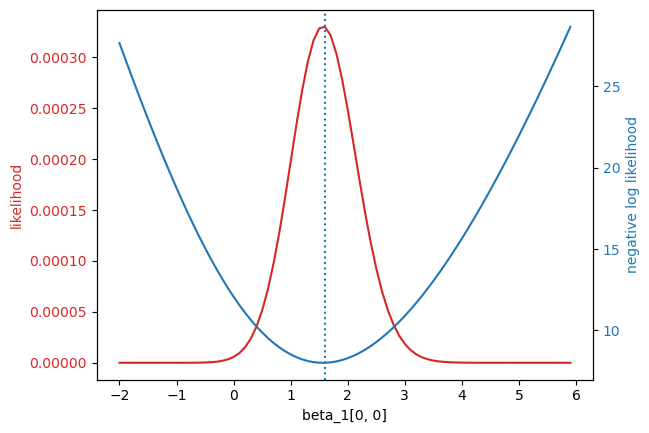

In [37]:
# 파라미터에 따른 우도 및 음의 로그 우도 변화 분석
beta_1_vals = np.arange(-2, 6.0, 0.1)
likelihoods = np.zeros_like(beta_1_vals)
nlls = np.zeros_like(beta_1_vals)
beta_0, omega_0, beta_1, omega_1 = get_parameters()

for count, val in enumerate(beta_1_vals):
    beta_1[0, 0] = val
    model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
    lambda_train = sigmoid(model_out)
    likelihoods[count] = compute_likelihood(y_train, lambda_train)
    nlls[count] = compute_negative_log_likelihood(y_train, lambda_train)
    if count % 20 == 0:
        # Run the model to get values to plot and plot it.
        model_out = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
        lambda_model = sigmoid(model_out)
        plot_binary_classification(x_model, model_out, lambda_model, x_train, y_train, title="beta_1[0]=%3.3f"%(beta_1[0,0]))
# 우도 및 음의 로그 우도 시각화
fig, ax = plt.subplots()
likelihood_color = 'tab:red'
nll_color = 'tab:blue'
ax.set_xlabel('beta_1[0, 0]')
ax.set_ylabel('likelihood', color=likelihood_color)
ax.plot(beta_1_vals, likelihoods, color=likelihood_color)
ax.tick_params(axis='y', labelcolor=likelihood_color)
ax1 = ax.twinx()
ax1.plot(beta_1_vals, nlls, color=nll_color)
ax1.set_ylabel('negative log likelihood', color=nll_color)
ax1.tick_params(axis='y', labelcolor=nll_color)
plt.axvline(x=beta_1_vals[np.argmax(likelihoods)], linestyle='dotted')
plt.show()


Maximum likelihood at beta_1=1.600
Minimum negative log likelihood at beta_1=1.600


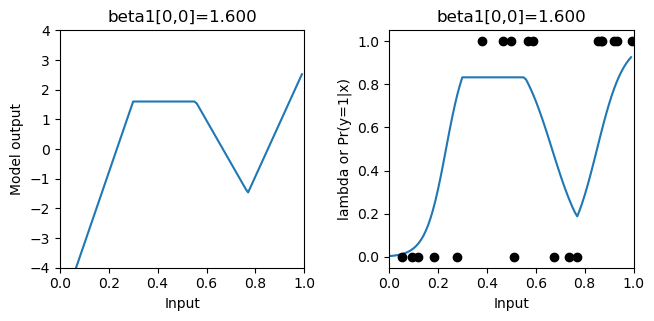

In [40]:

# 최적 파라미터 확인
print("Maximum likelihood at beta_1=%3.3f" % beta_1_vals[np.argmax(likelihoods)])
print("Minimum negative log likelihood at beta_1=%3.3f" % beta_1_vals[np.argmin(nlls)])

# 최적 모델 시각화
beta_1[0, 0] = beta_1_vals[np.argmin(nlls)]
model_out = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
lambda_model = sigmoid(model_out)
plot_multiclass_classification(x_model, model_out, lambda_model, x_train, y_train, title="beta1[0,0]=%3.3f" % beta_1[0, 0])
